In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from lsm import LSM, Utils

# Исходные данные

In [16]:
df = pd.read_csv("california_housing_train.csv")
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Визуализация

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

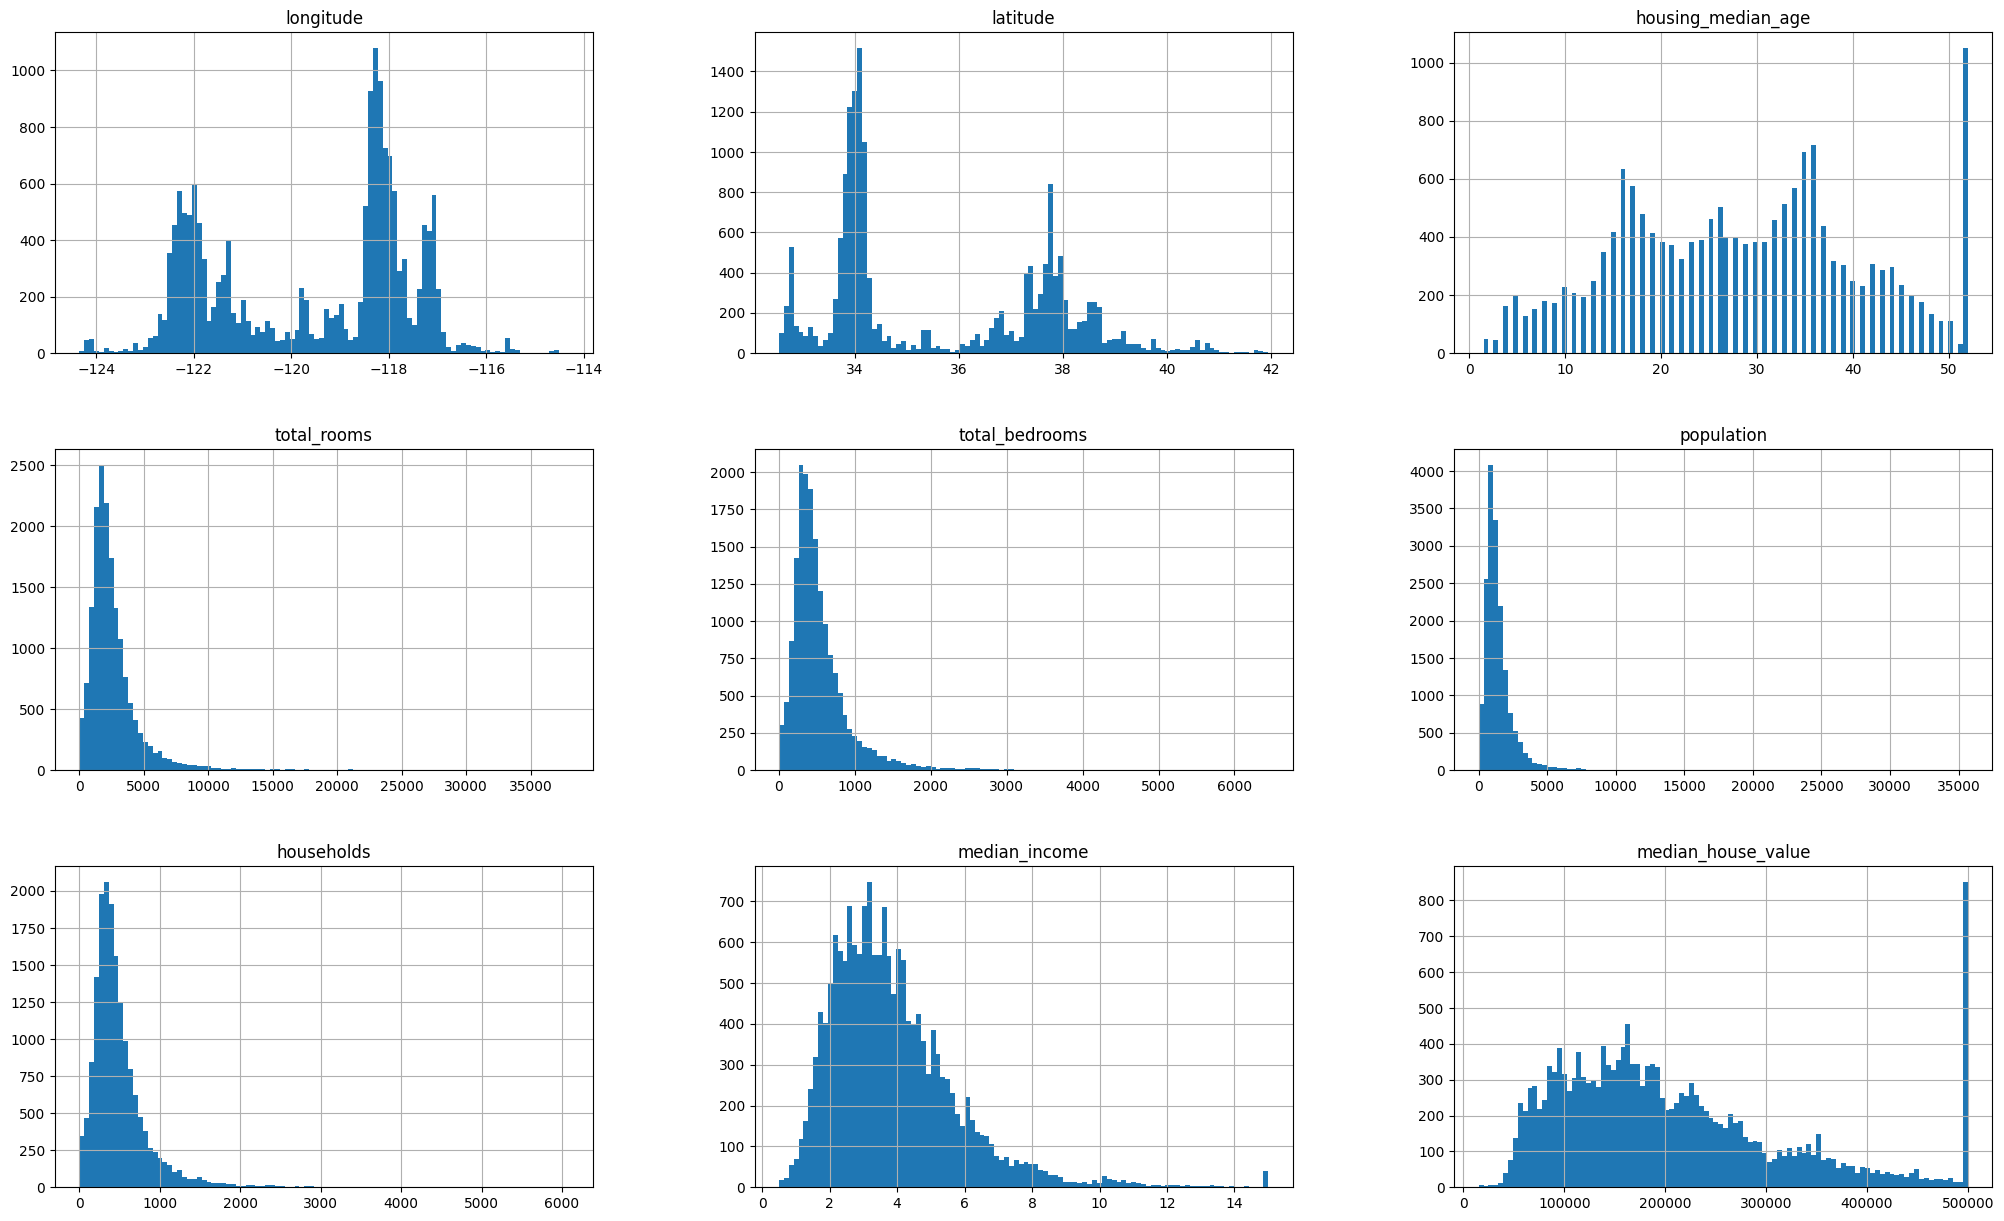

In [4]:
df.hist(figsize=(25, 15), bins=100)

Рассмотрим корреляцию признаков

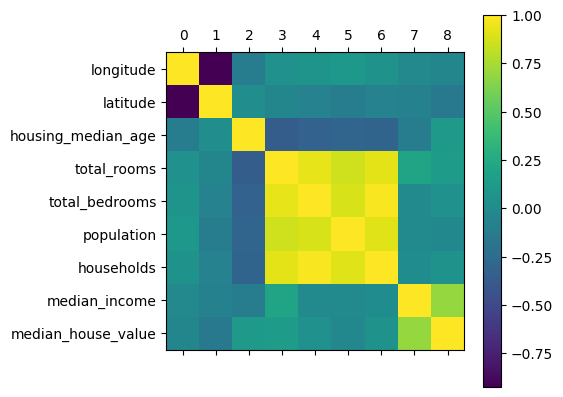

In [5]:
plt.matshow(df.corr())
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()

Наблюдаем корреляцию между total_rooms, total_bedrooms, population и households. Это не особо интересно, т.к. является очевидным и ожидаемым - больше людей занимают больше комнат, а соответственно, и больше спален

Кроме этого видна корреляция между median_income и median_house_value.

Чтобы рассмотреть её подробнее, разобьём средний доход на "уровни"

<Axes: xlabel='income_level'>

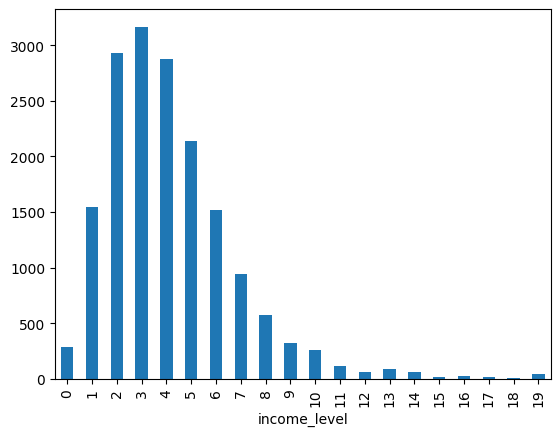

In [18]:
df['income_level'] = pd.cut(df['median_income'], 20, labels=range(20))
df['income_level'].value_counts(sort=False).plot(kind='bar')

Рассмотрим корреляцию и разброс по уровню дохода

<Axes: xlabel='income_level', ylabel='median_house_value'>

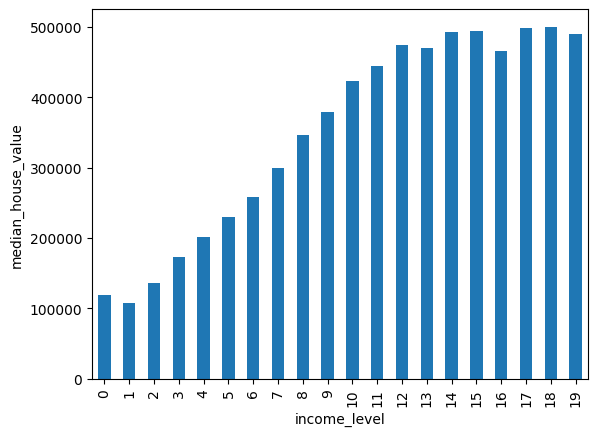

In [7]:
df.groupby('income_level', observed=False)['median_house_value'].mean().plot(kind='bar', ylabel='median_house_value')

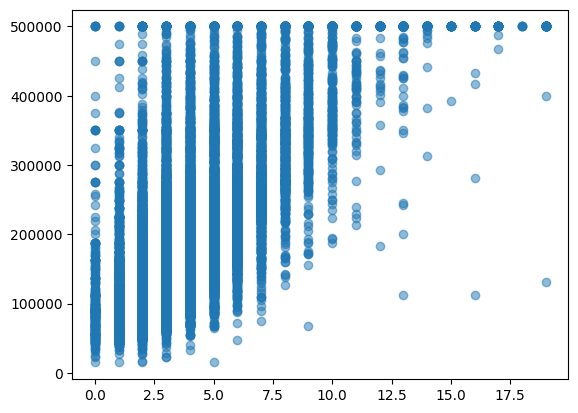

In [8]:
plt.scatter(df['income_level'], df['median_house_value'], alpha=0.5)

Корреляция не совсем линейна. По разбросу понятно, что уровни дохода примерно с 2 по 5 живут во всех вариантах стоимости домов - от дешёвых до дорогих

# Разделение данных на обучающий и тестовый наборы

In [9]:
train = df.sample(frac=0.7, random_state=73)
test = df.drop(train.index)
(train_x, train_y) = Utils.split(train, 'median_house_value')
(test_x, test_y) = Utils.split(test, 'median_house_value')

In [10]:
def handle(columns: list[str]):
    lsm = LSM(columns)
    lsm.train(train_x, train_y)
    pred_y = lsm.predict(test_x)
    print('Коэффициент детерминации:', Utils.determination_coefficient(test_y, pred_y))
    print('Сумма квадратов:', Utils.sum_of_squares(test_y, pred_y))

In [14]:
handle(train_x.columns)

Коэффициент детерминации: 0.64429453155274
Сумма квадратов: 24014083152873.36


In [12]:
handle(['median_income'])

Коэффициент детерминации: 0.4792774743645708
Сумма квадратов: 35154573486793.266


In [13]:
handle(['median_income', 'population'])

Коэффициент детерминации: 0.47906091598649436
Сумма квадратов: 35169193590671.008
